<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#imports" data-toc-modified-id="imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>imports</a></span></li><li><span><a href="#data" data-toc-modified-id="data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>data</a></span></li><li><span><a href="#play" data-toc-modified-id="play-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>play</a></span></li><li><span><a href="#draw" data-toc-modified-id="draw-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>draw</a></span></li><li><span><a href="#sandbox" data-toc-modified-id="sandbox-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>sandbox</a></span></li></ul></div>

# imports

In [2]:
import numpy as np

# data

In [529]:
lake = np.array([
    list('SFFFF'),
    list('FHFHF'),
    list('FHFHF'),
    list('FFFHF'),
    list('HFFGF')
])

# play

In [558]:
def get_state(state_tup):
    if 0 <= state_tup[0] < lake.shape[0] and 0 <= state_tup[1] < lake.shape[1]:
        return lake[state_tup]
    else:
        return 'H'


def get_line_no(state_tup):
    return state_tup[0] * lake.shape[1] + state_tup[1]

def get_tup(line_no):
    return (line_no // lake.shape[1], line_no % lake.shape[1])

def perform_action(action, state_tup):
    if action == 0:
        return (state_tup[0] - 1, state_tup[1])
    elif action == 1:
        return (state_tup[0], state_tup[1] + 1)
    elif action == 2:
        return (state_tup[0] + 1, state_tup[1])
    elif action == 3:
        return (state_tup[0], state_tup[1] - 1)


def session(state_tup, distr):
    state = get_state(state_tup)
    z = []
    while state not in ['H', 'G']:
        action_distr = distr[:, get_line_no(state_tup)]
        action = np.random.choice(range(4), p=action_distr)
        old_state_tup = state_tup
        state_tup = perform_action(action, state_tup)
        state = get_state(state_tup)
        z.append((old_state_tup, action))
    return z, state_tup, state


def get_good_sessions(sessions):
    rewards = []
    for sess in sessions:
        rewards.append((sess[-1] == 'G') / len(sess[0]))
    return [sess  for sess, rew in zip(sessions, rewards) if rew > np.median(rewards)]

def recalculate_distr_matrix(all_sessions, distr):
    good_sessions = get_good_sessions(all_sessions)
    new_distr = np.ones_like(distr)
    for sess in good_sessions:
        for state_tup, action in sess[0]:
            new_distr[action, get_line_no(state_tup)] += 1
#     plot_distr(new_distr)
    new_distr /= new_distr.sum(axis=0, keepdims=True)
    to_replace = np.isnan(new_distr).any(axis=0)
    new_distr[:, to_replace] = distr[:, to_replace]
    return new_distr


def plot_distr(distr):
    plt.figure(figsize=(distr.shape[1], distr.shape[0]))
    sns.heatmap(distr, annot=True)
    plt.show()


def iteration(distr):
    sss = []
    for i in range(1000):
        sss.append(session((0, 0), distr))
    new_distr = recalculate_distr_matrix(sss, distr)
    return new_distr

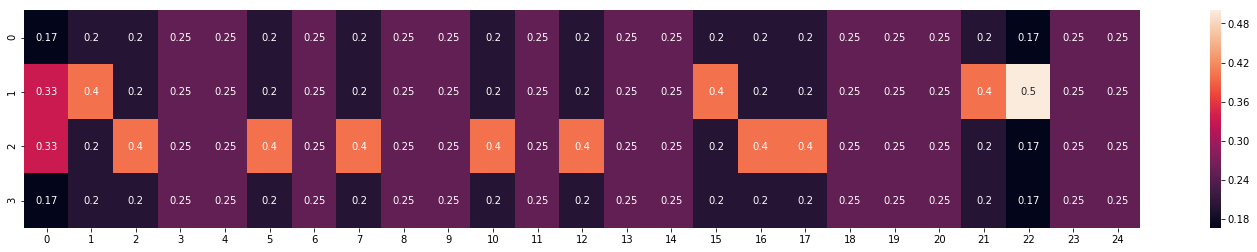

In [565]:
A = np.full((4, np.prod(lake.shape)), 0.25)
new_distr = A.copy()
for i in range(5):
    new_distr = iteration(new_distr)
plot_distr(new_distr)

# draw

In [568]:
def render_cell(up=False, right=False, down=False, left=False, text=''):
    return """{text}{left}{up}{right}{down}""".format(
        text=text,
        left='\u2190' if left else ' ',
        up='\u2191' if up else ' ',
        down='\u2193' if down else ' ',
        right='\u2192' if right else ' ',
    )


def draw_startegy(distr):
    res = np.full(lake.shape, None)
    for i in range(distr.shape[1]):
        tup = get_tup(i)
        action_distr = distr[:, i]
        t = tuple(action_distr > 0.25)
        res[tup] = render_cell(*t, text='%s: ' % get_state(tup))
    return ('\n%s\n' % ('-' * (lake.shape[1] * 10 + 1))).join(
        ['| %s |' % ' | '.join(line) for line in res])

In [569]:
res = draw_startegy(new_distr)


print(res)

| S:   →↓ | F:   →  | F:    ↓ | F:      | F:      |
---------------------------------------------------
| F:    ↓ | H:      | F:    ↓ | H:      | F:      |
---------------------------------------------------
| F:    ↓ | H:      | F:    ↓ | H:      | F:      |
---------------------------------------------------
| F:   →  | F:    ↓ | F:    ↓ | H:      | F:      |
---------------------------------------------------
| H:      | F:   →  | F:   →  | G:      | F:      |


In [493]:
res = draw_startegy(new_distr)


print(res)

| S:   →↓ | F:   →  | F:   →  | F:   →  | F:    ↓ |
---------------------------------------------------
| F:  ↑   | H:      | F:      | H:      | F:    ↓ |
---------------------------------------------------
| F:      | F:      | F:      | H:      | F:    ↓ |
---------------------------------------------------
| H:      | F:      | H:      | G:      | F: ←    |


In [549]:
import seaborn as sns

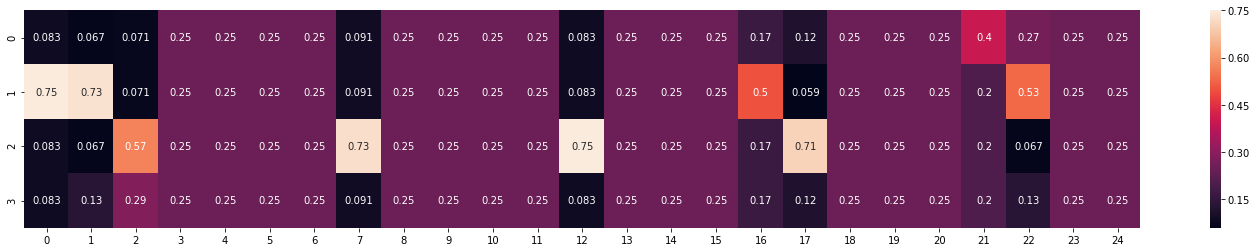

# sandbox

In [570]:
from sklearn.neural_network import MLPClassifier

In [ ]:
MLPClassifier()